<a href="https://colab.research.google.com/github/06Cata/06Cata/blob/main/Kaggle_eCommerce_cosmetics_shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
import kagglehub

path = kagglehub.dataset_download("mkechinov/ecommerce-events-history-in-cosmetics-shop")

print("Path to dataset files:", path)

100%|██████████| 430M/430M [00:08<00:00, 51.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop/versions/6


In [3]:
import os

files = os.listdir(path)
print("資料夾內的檔案：")
for f in files:
    print(f)


資料夾內的檔案：
2020-Jan.csv
2019-Oct.csv
2019-Dec.csv
2020-Feb.csv
2019-Nov.csv


In [4]:
from glob import glob

data_path = path
csv_files = glob(os.path.join(data_path, "*.csv"))

df_list = [pd.read_csv(f) for f in csv_files]
df_all = pd.concat(df_list, ignore_index=True)

print("資料筆數：", len(df_all))
df_all.head()

資料筆數： 20692840


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


In [141]:
from glob import glob

data_path = path
csv_files = glob(os.path.join(data_path, "2019-Oct.csv"))

df_list = [pd.read_csv(f) for f in csv_files]
df_test = pd.concat(df_list, ignore_index=True)

print("資料筆數：", len(df_test))
df_test.head()

資料筆數： 4102283


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [142]:
df_test = df_test.iloc[:100000]

In [143]:
df = df_test.copy()
df.shape[0]

100000

In [144]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     100000 non-null  object 
 1   event_type     100000 non-null  object 
 2   product_id     100000 non-null  int64  
 3   category_id    100000 non-null  int64  
 4   category_code  1808 non-null    object 
 5   brand          60062 non-null   object 
 6   price          100000 non-null  float64
 7   user_id        100000 non-null  int64  
 8   user_session   99994 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


In [146]:
df['event_type'].unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

In [147]:
df['category_code'].unique()

array([nan, 'appliances.environment.vacuum', 'stationery.cartrige',
       'apparel.glove', 'accessories.bag',
       'furniture.living_room.cabinet', 'furniture.bathroom.bath',
       'appliances.personal.hair_cutter', 'accessories.cosmetic_bag',
       'appliances.environment.air_conditioner',
       'furniture.living_room.chair'], dtype=object)

In [148]:
df['user_session'].unique()

array(['26dd6e6e-4dac-4778-8d2c-92e149dab885',
       '49e8d843-adf3-428b-a2c3-fe8bc6a307c9',
       '73dea1e7-664e-43f4-8b30-d32b9d5af04f', ...,
       '4ea43d52-4f65-403b-bbe6-5105e636f5e7',
       '17458938-1477-4875-9fa0-5c0247f1e523',
       '7ed43649-8d9d-46a7-8d90-171765e0b526'], dtype=object)

In [149]:
## test

# 挑一個session
sample_session = '49e8d843-adf3-428b-a2c3-fe8bc6a307c9'
# 過濾所有事件
session_df = df[df['user_session'] == sample_session]

# 按事件時間排序看行為流程
session_df = session_df.sort_values('event_time')
# print(session_df[['event_time', 'event_type', 'product_id', 'price', 'brand']])
session_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
11,2019-10-01 00:00:28 UTC,remove_from_cart,5834172,1487580013522845895,NaN,runail,0.95,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
12,2019-10-01 00:00:30 UTC,remove_from_cart,5809103,1487580013522845895,NaN,irisk,0.60,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
13,2019-10-01 00:00:30 UTC,remove_from_cart,5809103,1487580013522845895,NaN,irisk,0.60,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
14,2019-10-01 00:00:32 UTC,remove_from_cart,5779403,1487580013506068678,NaN,NaN,12.22,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
15,2019-10-01 00:00:33 UTC,remove_from_cart,5779403,1487580013506068678,NaN,NaN,12.22,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
17,2019-10-01 00:00:42 UTC,cart,5836522,1487580013522845895,NaN,nagaraku,0.40,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
18,2019-10-01 00:00:43 UTC,cart,5836522,1487580013522845895,NaN,nagaraku,0.40,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
23,2019-10-01 00:00:56 UTC,remove_from_cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [190]:
import pandas as pd

df['event_time'] = pd.to_datetime(df['event_time'])

#
def extract_session_features(session_df):
    user_id = session_df['user_id']

    # 各事件的統計
    num_cart = (session_df['event_type'] == 'cart').sum() # 加入購物車的次數
    num_remove = (session_df['event_type'] == 'remove_from_cart').sum() # 從購物車移除的次數
    num_purchase = (session_df['event_type'] == 'purchase').sum() # 購買的商品數量

    # 價格統計
    total_cart_value = session_df[session_df['event_type'] == 'cart']['price'].sum() # 	加入購物車商品的總金額
    total_purchase_value = session_df[session_df['event_type'] == 'purchase']['price'].sum() # 最終購買的總金額

    # 品牌數量
    unique_brands = session_df['brand'].nunique()
    purchase_brands = session_df[session_df['event_type'] == 'purchase']['brand'].dropna() # 出現過的品牌數量（不管事件類型）
    most_purchased_brand = purchase_brands.mode().iloc[0] if not purchase_brands.empty else 'unknown' # 購買時涉及的品牌數量
    num_purchase_brands = purchase_brands.nunique()

    # 購買行為拆解
    cart_set = set(session_df[session_df['event_type'] == 'cart']['product_id']) # 該 session 中最常購買的品牌
    purchase_set = set(session_df[session_df['event_type'] == 'purchase']['product_id'])
    direct_purchase = purchase_set - cart_set # 購買但沒加入購物車的商品數
    carted_purchase = purchase_set & cart_set # 有先加購物車後購買的商品數

    # 時間統計
    duration = (session_df['event_time'].max() - session_df['event_time'].min()).total_seconds() / 60 # 該 session 活動時間
    session_hour = session_df['event_time'].iloc[0].hour  # 該 session 發生的起始小時點，查看偏好購物時間

    return pd.Series({
        'user_id': user_id,
        'num_cart': num_cart,
        'num_remove': num_remove,
        'num_purchase': num_purchase,
        'total_cart_value': total_cart_value,
        'total_purchase_value': total_purchase_value,
        'unique_brands': unique_brands,
        'num_purchase_brands': num_purchase_brands,
        'most_purchased_brand': most_purchased_brand,
        'session_duration_min': duration,
        'session_start_hour': session_hour,
        'num_purchase_only': len(direct_purchase),
        'num_purchase_in_cart': len(carted_purchase),
        'purchase_direct_ratio': len(direct_purchase) / (len(purchase_set) or 1), # 直接購買的比例
        'purchase_occurred': int(num_purchase > 0) # 是否發生購買（0 or 1）
    })


In [191]:
# 萃取每個 session 的統計特徵
session_features_df = df.groupby('user_session').apply(extract_session_features).reset_index()
session_features_df

<ipython-input-191-623ea0abd611>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  session_features_df = df.groupby('user_session').apply(extract_session_features).reset_index()


,user_session,user_id,num_cart,num_remove,num_purchase,total_cart_value,total_purchase_value,unique_brands,num_purchase_brands,most_purchased_brand,session_duration_min,session_start_hour,num_purchase_only,num_purchase_in_cart,purchase_direct_ratio,purchase_occurred
0,00078370-40e1-493f-9fa5-254bb151f170,"11166 423875527 Name: user_id, dtype: int64",0,0,0,0.00,0.0,0,0,unknown,0.000000,5,0,0,0.0,0
1,00088265-2f10-4d7d-adc7-984c4b81b13e,"34875 296105980 Name: user_id, dtype: int64",0,0,0,0.00,0.0,0,0,unknown,0.000000,9,0,0,0.0,0
2,0009f298-bb5e-4f91-98ae-3575ba106eec,39603 449070972 39886 449070972 39917 ...,0,0,0,0.00,0.0,0,0,unknown,5.466667,9,0,0,0.0,0
3,000b5f61-9911-4200-8a4a-7e2f8a32fd60,61210 555624842 63600 555624842 Name: us...,0,0,0,0.00,0.0,1,0,unknown,19.283333,12,0,0,0.0,0
4,000b7a18-10fd-44ef-8033-7bf9e9170701,"15378 549413100 Name: user_id, dtype: int64",0,0,0,0.00,0.0,1,0,unknown,0.000000,6,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20868,ffeb914b-e3cd-44c8-af80-aefca903f17a,"5358 555481318 Name: user_id, dtype: int64",0,0,0,0.00,0.0,0,0,unknown,0.000000,4,0,0,0.0,0
20869,fff1bf89-f021-44b3-9af0-441b83d6c027,"6226 426911087 Name: user_id, dtype: int64",0,0,0,0.00,0.0,1,0,unknown,0.000000,4,0,0,0.0,0
20870,fff258b0-e104-46d1-b87f-6cc698e178b8,"98667 555730214 Name: user_id, dtype: int64",0,0,0,0.00,0.0,0,0,unknown,0.000000,17,0,0,0.0,0
20871,fff4d9ba-917b-467b-85d5-da8c21818a4a,89618 452075971 89693 452075971 89895 ...,21,0,0,29.04,0.0,5,0,unknown,59.616667,16,0,0,0.0,0


In [192]:
session_features_df.shape[0]

20873

In [193]:
# check

session_features_df[session_features_df['user_session']=='49e8d843-adf3-428b-a2c3-fe8bc6a307c9']

,user_session,user_id,num_cart,num_remove,num_purchase,total_cart_value,total_purchase_value,unique_brands,num_purchase_brands,most_purchased_brand,session_duration_min,session_start_hour,num_purchase_only,num_purchase_in_cart,purchase_direct_ratio,purchase_occurred
6081,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2 429681830 4 429681830 11 42968...,5,49,0,28.32,0.0,10,0,unknown,4.2,0,0,0,0.0,0


In [194]:
# check

print(session_df[session_df['event_type'] == 'purchase']['brand'].unique())


[]


# Session 購買預測（分類）

In [195]:
df_test.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [196]:
session_features_df.columns

Index(['user_session', 'user_id', 'num_cart', 'num_remove', 'num_purchase',
       'total_cart_value', 'total_purchase_value', 'unique_brands',
       'num_purchase_brands', 'most_purchased_brand', 'session_duration_min',
       'session_start_hour', 'num_purchase_only', 'num_purchase_in_cart',
       'purchase_direct_ratio', 'purchase_occurred'],
      dtype='object')

[0]	validation_0-logloss:0.52387
[1]	validation_0-logloss:0.42963
[2]	validation_0-logloss:0.37523
[3]	validation_0-logloss:0.34132
[4]	validation_0-logloss:0.31743
[5]	validation_0-logloss:0.30122
[6]	validation_0-logloss:0.28787
[7]	validation_0-logloss:0.27760
[8]	validation_0-logloss:0.27169
[9]	validation_0-logloss:0.26396
[10]	validation_0-logloss:0.25875
[11]	validation_0-logloss:0.25203
[12]	validation_0-logloss:0.24864
[13]	validation_0-logloss:0.24497
[14]	validation_0-logloss:0.24207
[15]	validation_0-logloss:0.24134
[16]	validation_0-logloss:0.23791
[17]	validation_0-logloss:0.23442


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  msg += " or "


[18]	validation_0-logloss:0.23262
[19]	validation_0-logloss:0.22988
[20]	validation_0-logloss:0.22745
[21]	validation_0-logloss:0.22602
[22]	validation_0-logloss:0.22539
[23]	validation_0-logloss:0.22464
[24]	validation_0-logloss:0.22404
[25]	validation_0-logloss:0.22295
[26]	validation_0-logloss:0.22073
[27]	validation_0-logloss:0.21925
[28]	validation_0-logloss:0.21684
[29]	validation_0-logloss:0.21425
[30]	validation_0-logloss:0.21232
[31]	validation_0-logloss:0.21212
[32]	validation_0-logloss:0.21061
[33]	validation_0-logloss:0.21041
[34]	validation_0-logloss:0.20995
[35]	validation_0-logloss:0.21022
[36]	validation_0-logloss:0.21032
[37]	validation_0-logloss:0.20946
[38]	validation_0-logloss:0.20933
[39]	validation_0-logloss:0.20886
[40]	validation_0-logloss:0.20765
[41]	validation_0-logloss:0.20727
[42]	validation_0-logloss:0.20703
[43]	validation_0-logloss:0.20555
[44]	validation_0-logloss:0.20514
[45]	validation_0-logloss:0.20524
[46]	validation_0-logloss:0.20442
[47]	validatio

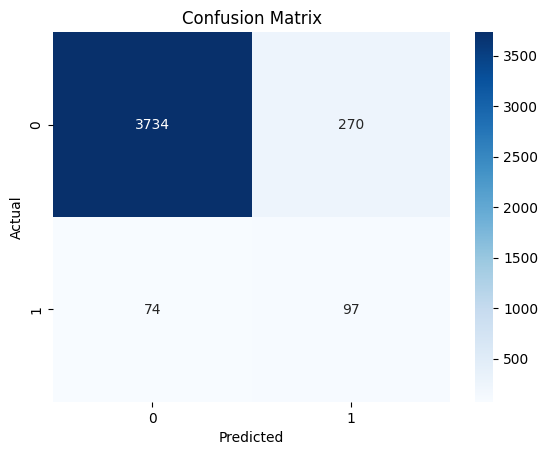

In [198]:
!pip install -U xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt


# features, label # user_id 不放入，最後merge回來，發送購買提醒
X = session_features_df[[
    'num_cart',
    'num_remove',
    'total_cart_value',
    'unique_brands',
    'session_duration_min',
    'session_start_hour'
]]
y = session_features_df['purchase_occurred']

# train 0.6 / valid 0.2 / test 0.2
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=123)  # 0.25 x 0.8 = 0.2


# model
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]) # 調整類別權重

clf = XGBClassifier(
    tree_method='hist',
    device='cuda',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight, # 調整類別權重
    early_stopping_rounds=20
)

clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=True
)
# print(f"Best iteration: {clf.best_iteration}")


# 調整閾值：使用 predict_proba 並自行設定門檻
# y_pred = clf.predict(X_test)

# threshold = 0.3
# y_proba = clf.predict_proba(X_test)[:, 1]
# y_pred = (y_proba > threshold).astype(int)
# print(classification_report(y_test, y_pred))

for t in [0.3]: # , 0.4, 0.5
    y_proba = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_proba > t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred))


#
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [204]:
# 把預測結果加到 X_test (session特徵表)
X_test = X_test.copy()  # 避免警告
X_test['predicted_purchase'] = y_pred
X_test['purchase_probability'] = y_proba

# 只抓出預測會購買的 session
predicted_sessions = X_test.loc[X_test['predicted_purchase'] == 1].index

# 用 index 從原始的 session_features_df 抓 user_id 與該 session 的其他欄位
predicted_df = session_features_df.loc[predicted_sessions, ['user_session', 'user_id']].copy()

# 如果你想帶預測機率也一起放進來
predicted_df = predicted_df.merge(
    X_test[['predicted_purchase', 'purchase_probability']],
    left_index=True, right_index=True
)

print(f"預測會購買的 session 數量: {predicted_df.shape[0]}")
predicted_df_sorted = predicted_df.sort_values('purchase_probability', ascending=False)
predicted_df_sorted


預測會購買的 session 數量: 380


,user_session,user_id,predicted_purchase,purchase_probability
12232,96402d76-28be-cc6e-941b-70ffcb8f2bce,98078 551393393 98081 551393393 98083 ...,1,0.999811
18287,df72e7df-cf0b-41b8-bc5b-f0eedbe86984,4620 514361210 4621 514361210 4622 51...,1,0.999499
3994,2fe55ab0-365e-4777-bd99-9937570107b1,1387 553999552 1422 553999552 1451 55...,1,0.998839
16339,c81ef6ad-f451-4ab0-bd59-b651f7df246a,32159 419767710 32161 419767710 32162 ...,1,0.998732
3775,2d7c456c-5ce8-cbed-2de5-52876654f1f9,22981 522345265 22982 522345265 22983 ...,1,0.997529
...,...,...,...,...
16826,cdd7d61b-6012-47ce-a2d0-a6217078620b,33755 297720093 33761 297720093 33768 ...,1,0.308228
12077,94a13053-7b9f-a0db-d1ef-af23b3b515bf,66128 555591723 66210 555591723 66213 ...,1,0.306712
1547,12be8351-138a-44e8-b1f1-dcf00b36b74a,47923 549110033 50088 549110033 Name: us...,1,0.305985
19306,ec2703e3-1ba8-4f23-b8b0-bb2373edaf06,84163 471783592 84572 471783592 Name: us...,1,0.303805


In [187]:
# check
# 分布數量

print("Train label distribution:\n", y_train.value_counts())
print("Validation label distribution:\n", y_valid.value_counts())
print("Test label distribution:\n", y_test.value_counts())


Train label distribution:
 purchase_occurred
0    12023
1      500
Name: count, dtype: int64
Validation label distribution:
 purchase_occurred
0    4026
1     149
Name: count, dtype: int64
Test label distribution:
 purchase_occurred
0    4004
1     171
Name: count, dtype: int64


In [188]:
# check
# 重要特徵

clf.get_booster().get_score()

{'num_cart': 365.0,
 'num_remove': 382.0,
 'total_cart_value': 742.0,
 'unique_brands': 358.0,
 'session_duration_min': 864.0,
 'session_start_hour': 461.0}

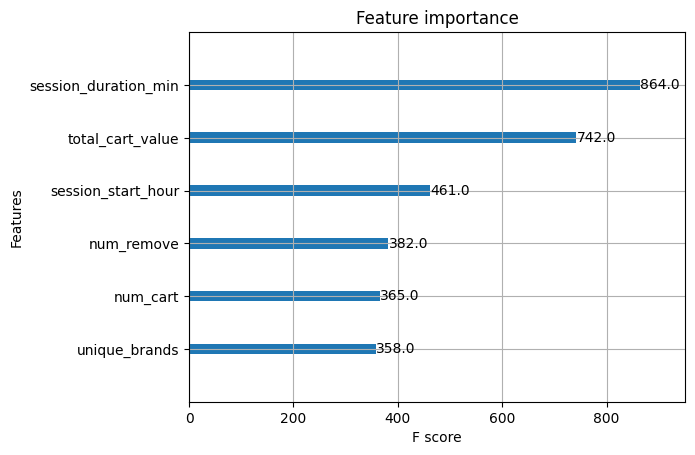

In [189]:
# check
# 重要特徵

import matplotlib.pyplot as plt
import xgboost as xgb

#
xgb.plot_importance(clf)
plt.show()
